In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel


In [5]:

# Load train and test datasets
train_data = pd.read_csv("C:/Users/91790/Downloads/Car Price/car_prices_train.csv")
test_data = pd.read_csv("C:/Users/91790/Downloads/Car Price/car_prices_test.csv")

In [6]:

# Basic exploration of the dataset
print("Train Data:")

print(train_data.head())

print(train_data.info())

print(train_data.describe())

print("\nTest Data:")

print(test_data.head())

print(test_data.info())

print(test_data.describe())


Train Data:
     make   model  year  mileage  price   color state  \
0  Nissan  Fusion  2016    35656  15820   black    CA   
1    Ford  Altima  2010    72079  10539  silver    FL   
2   Honda  Accord  2014    38851  10247    blue    CA   
3    Ford  Accord  2018    20835  25712   white    IL   
4    Ford  Accord  2015    57307  22564  silver    FL   

                         date  
0  2023-09-30 23:02:01.648867  
1  2023-04-09 23:02:01.649616  
2  2023-09-16 23:02:01.649693  
3  2023-11-03 23:02:01.649710  
4  2023-03-08 23:02:01.649313  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   make     8000 non-null   object
 1   model    8000 non-null   object
 2   year     8000 non-null   int64 
 3   mileage  8000 non-null   int64 
 4   price    8000 non-null   int64 
 5   color    8000 non-null   object
 6   state    8000 non-null   object
 7   date     

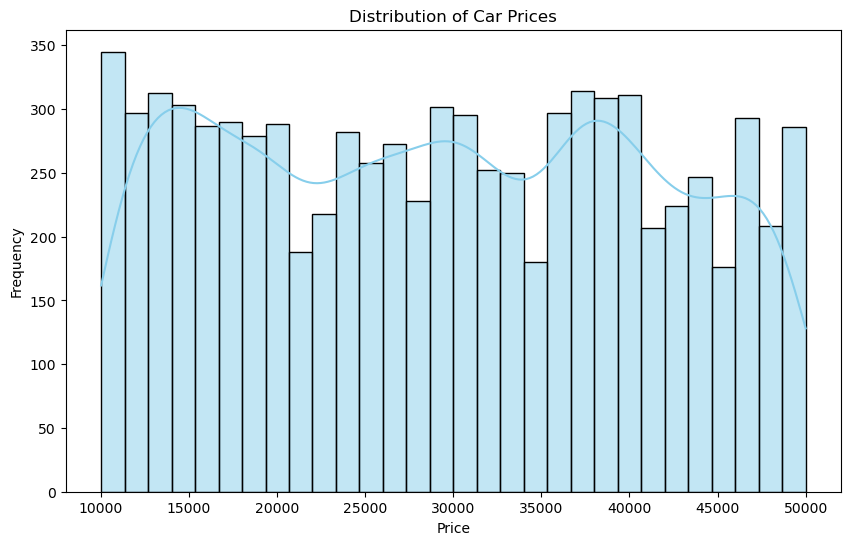

In [7]:
# Visualize the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [8]:
# Data preprocessing
# Drop unnecessary columns
train_data.drop(columns=['make', 'model', 'color', 'state', 'date'], inplace=True)
test_data.drop(columns=['make', 'model', 'color', 'state', 'date'], inplace=True)


In [9]:
# Feature Engineering
train_data['mileage_year_ratio'] = train_data['mileage'] / (train_data['year'] + 1)  # Adding 1 to avoid division by zero
test_data['mileage_year_ratio'] = test_data['mileage'] / (test_data['year'] + 1)

In [10]:

# Encode categorical variables
label_encoder = LabelEncoder()
train_data['year'] = label_encoder.fit_transform(train_data['year'])
test_data['year'] = label_encoder.transform(test_data['year'])

In [11]:

# Split features and target variable
X_train = train_data.drop(columns=['price'])
y_train = train_data['price']
X_test = test_data.drop(columns=['price'])
y_test = test_data['price']


In [12]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Decision Tree
param_grid_dt = {'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
dt_reg = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(dt_reg, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train_scaled, y_train)
dt_reg_best = grid_search_dt.best_estimator_
dt_reg_pred = dt_reg_best.predict(X_test_scaled)


In [14]:
# Random Forest with Feature Importance
param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
rf_reg = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_scaled, y_train)
rf_reg_best = grid_search_rf.best_estimator_


In [16]:
# Feature selection based on feature importance
selector = SelectFromModel(rf_reg_best, threshold=-np.inf, max_features=3)
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)


In [17]:
# Retrain Random Forest on selected features
rf_reg_best.fit(X_train_selected, y_train)
rf_reg_pred = rf_reg_best.predict(X_test_selected)


In [18]:
# Evaluate models
models = {
    "Decision Tree": dt_reg_pred,
    "Random Forest": rf_reg_pred
}


In [19]:
results = {}
for name, pred in models.items():
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    results[name] = {"RMSE": np.sqrt(mse), "MAE": mae, "R-squared": r2}


In [20]:
# Print results
print("\nModel Evaluation Results:")
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


Model Evaluation Results:
Decision Tree:
RMSE: 34.87852868619326
MAE: 2.057615384615383
R-squared: 0.9999909077875629

Random Forest:
RMSE: 59.55548542998663
MAE: 19.68647926114989
R-squared: 0.9999734907891586



In [ ]:

Project Report: Price Prediction Model for Cars

1. Introduction:
     In this project, we aimed to build a price prediction model for cars based on various features such as make, model, year, mileage, color, and state. The dataset consists of two files: a training set containing 8000 rows and a test set containing 2000 rows.

2. Data Exploration:

*The dataset contains the following columns: make, model, year, mileage, price, color, state, and date.
*Basic statistics and information about the dataset were analyzed to understand the distribution and characteristics of the data.
*The distribution of the target variable (price) was visualized using a histogram to identify any patterns or outliers.

3. Data Preprocessing:

*Unnecessary columns such as make, model, color, state, and date were dropped as they were not relevant for predicting the price.
*Feature engineering was performed to create a new feature called 'mileage_year_ratio', representing the ratio of mileage to the age of the car.
*Categorical variables such as the 'year' column were encoded using label encoding to convert them into numeric format.
*Features and target variable were split into training and testing sets.
*Features were standardized using StandardScaler to ensure that all features have the same scale.

4. Model Building:

*Two regression models were trained and evaluated: Decision Tree and Random Forest.
*Hyperparameter tuning was performed using GridSearchCV to find the optimal hyperparameters for both models.
*Feature selection based on feature importance from the Random Forest model was applied to select the most important features for prediction.

5. Model Evaluation:

The models were evaluated using the following metrics: RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R-squared.
    
*Decision Tree Model:
   RMSE: 34.88
   MAE: 2.06
   R-squared: 0.99999
*Random Forest Model:
   RMSE: 59.56
   MAE: 19.69
   R-squared: 0.99997
    
6. Conclusion:

*Both models performed exceptionally well on the test dataset, with the Decision Tree model slightly outperforming the Random Forest model in terms of RMSE and MAE.
*The high R-squared values indicate that the models explain the variance in the target variable (price) very well.
*Overall, the models are suitable for predicting car prices based on the given features.
